# Loan Application Status Prediction

Downlaod Files:

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
ldf = pd.read_csv("Loan_Application_Status_Prediction.csv")

In [3]:
ldf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
ldf.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

we can see that Loan id is having most unique set of datas,then ApplicantIncome ,Coapplicant Income, and Loan Amount.


In [5]:
ldf.shape

(614, 13)

There are 614 rows and 13 columns in this dataset.


In [6]:
ldf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Found out all the column names in the dataset.

# Exploratory Data Analysis

In [7]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
ldf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
ldf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Plotting Countplots

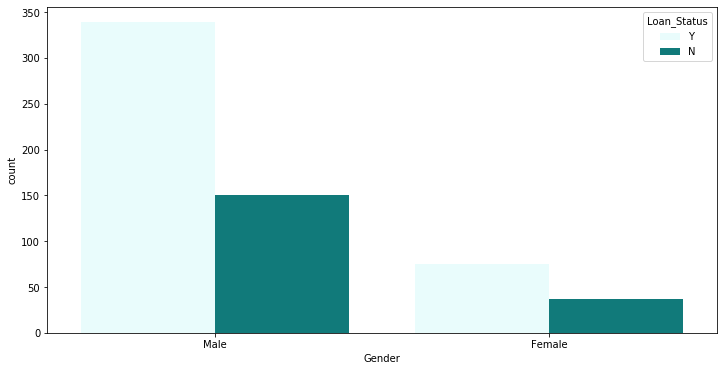

In [10]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender' , hue = 'Loan_Status' , data = ldf , dodge = True , color = 'darkcyan')

Observation:

Males are getting more Loans as compared to womens.

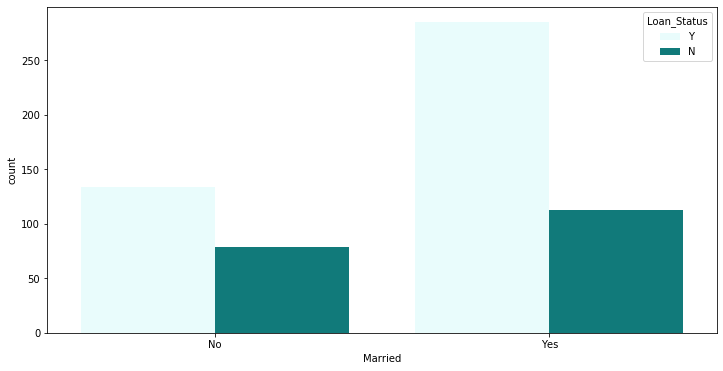

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = ldf , dodge = True , color = 'darkcyan')

Observation:

If someone is married there's more chance for them of getting a Loan

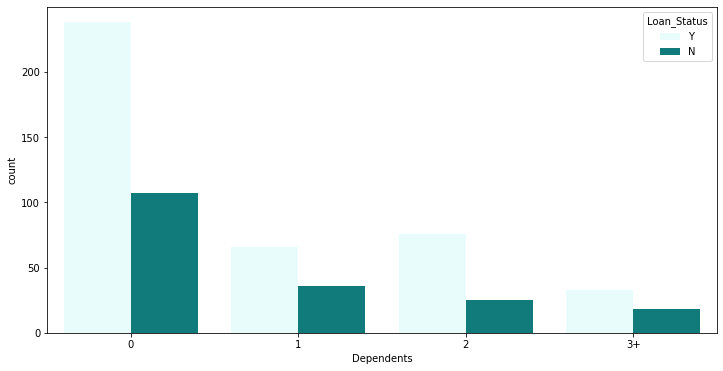

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Loan_Status' , data = ldf , dodge = True , color = 'darkcyan')

Observation:

If the number of dependents are less , there's more chance of them getting a loan (i.e if dependents are 0 he/she has the highest chance of getting a Loan. 

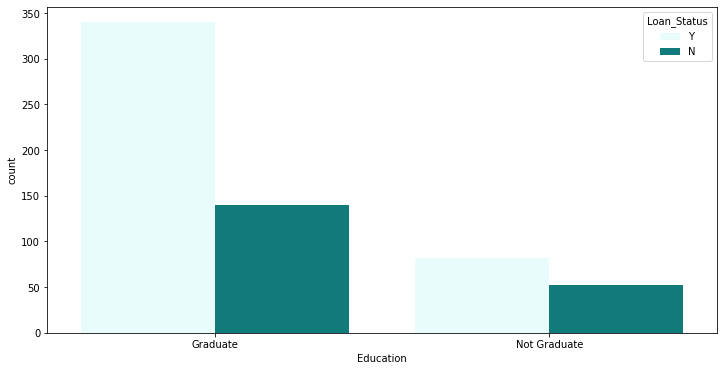

In [13]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = ldf , dodge = True , color = 'darkcyan')

Observation:

The Graduates have the higher chance of getting a Loan

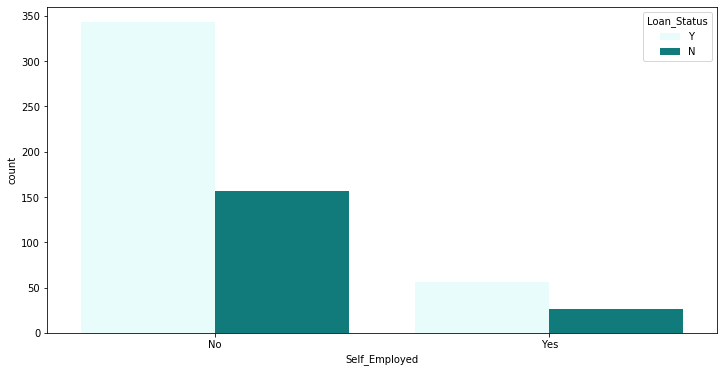

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Self_Employed' , hue = 'Loan_Status' , data = ldf , dodge = True , color = 'darkcyan')

Observation:

If someone is self-employed he/she has the less chance of getting a Loan as compared to Not Self-Employed.

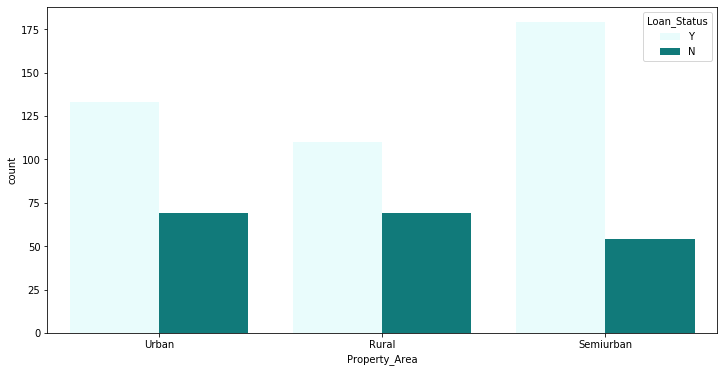

In [15]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Property_Area' , hue = 'Loan_Status' , data = ldf , dodge = True , color = 'darkcyan')

Observation:

Getting Loan according to Property_Area are in this way Semiurban > Urban > Rural.

# Data Preprocessing

Finding features which are of integer datatype



In [16]:
int_type = [feature for feature in ldf.columns if ldf[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in adf is :" , len(int_type))

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Number of columns with integer data type in adf is : 5


In [17]:
object_type = [feature for feature in ldf.columns if ldf[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Number of columns with object data type in adf is : 8


In [18]:
ldf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Finding percentage of Null Values for each feature.

In [19]:
for col in ldf:
    percentage = np.round((ldf[col].isnull().sum()/614)*100,2)
    print(col,':' , percentage,'%')

Loan_ID : 0.0 %
Gender : 2.12 %
Married : 0.49 %
Dependents : 2.44 %
Education : 0.0 %
Self_Employed : 5.21 %
ApplicantIncome : 0.0 %
CoapplicantIncome : 0.0 %
LoanAmount : 3.58 %
Loan_Amount_Term : 2.28 %
Credit_History : 8.14 %
Property_Area : 0.0 %
Loan_Status : 0.0 %


Observation:

Gender , Married , Dependents , Self_Employed , LoanAmount , Loan_Amount_Term , Credit_History has some percentages of outliers . So we need to deal with them .

# Gender

In [20]:
ldf['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Observation:

Here majority is Male so we will replace Null values with Male

In [21]:
ldf['Gender'] = ldf['Gender'].fillna('Male')

In [22]:
ldf['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

# Married

In [23]:
ldf['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Observation:

Here majority is 'Yes' so we will replace the Null with 'Yes'.

In [24]:
ldf['Married'] = ldf['Married'].fillna('Yes')

In [25]:
ldf['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

# Dependent

In [26]:
ldf['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
ldf['Dependents'].isnull().sum()

15

Observation:

Here the majority of people have 0 dependents, so we will replace the null values with 0 dependents.

In [28]:
ldf.Dependents = ldf['Dependents'].fillna('O')

In [29]:
ldf['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
O      15
Name: Dependents, dtype: int64

# Self_Employed

In [30]:
ldf['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Observation:

Majoritry of the values are 'No' so we will replace the Null with 'No'.

In [31]:
ldf.Self_Employed = ldf['Self_Employed'].fillna('No')

In [32]:
ldf['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

# LoanAmount

In [33]:
ldf['LoanAmount'].isnull().sum()

22

In [34]:
ldf['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64


Observation:

In LoanAmount we will replace the Null values with mean.

In [35]:
ldf.LoanAmount = ldf['LoanAmount'].fillna((ldf.LoanAmount.mean()))

In [36]:
ldf['LoanAmount'].isnull().sum()

0

# Loan_Amount_Term

In [37]:
ldf['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
ldf['Loan_Amount_Term'].isnull().sum()

14

In [39]:
ldf['Loan_Amount_Term'].dtype

dtype('float64')


Observation:

Here majority of Loan_Amount_Term has a value of 360.0 , So we will replace the Null values wit 360.0 only

In [40]:
ldf.Loan_Amount_Term = ldf['Loan_Amount_Term'].fillna(360.0)

In [41]:
ldf['Loan_Amount_Term'].isnull().sum()

0

# Credit_History

In [42]:
ldf['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [43]:
ldf['Credit_History'].isnull().sum()

50


Observation:

Here majority has 1.0 Credit_History so we will replace Null with 1.0.

In [44]:
ldf.Credit_History = ldf['Credit_History'].fillna(1.0)

In [45]:
ldf['Credit_History'].isnull().sum()

0

In [46]:
ldf.info()
# Dealt with all the Null values .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Categorical Features

Now we need to deal with our categorical features.

We are using Label_Encoder to encode our categorical features.

LabelEncoder converts categorical features to a meaningful number.

In [47]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cat_col:
    ldf[col] = le.fit_transform(ldf[col])

In [48]:
ldf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [49]:
object_type = [feature for feature in ldf.columns if ldf[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['Loan_ID']
Number of columns with object data type in adf is : 1


Observation:

From above we can observe that we have successully encoded all our categorical features , there's only one feature left that is Loan_ID , so we wiil drop this as it is just an indexing , and will not constitute much in our future predictions.

In [50]:
ldf = ldf.drop('Loan_ID' , axis = 1)

In [51]:
ldf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Outliers
Visualising Outliers

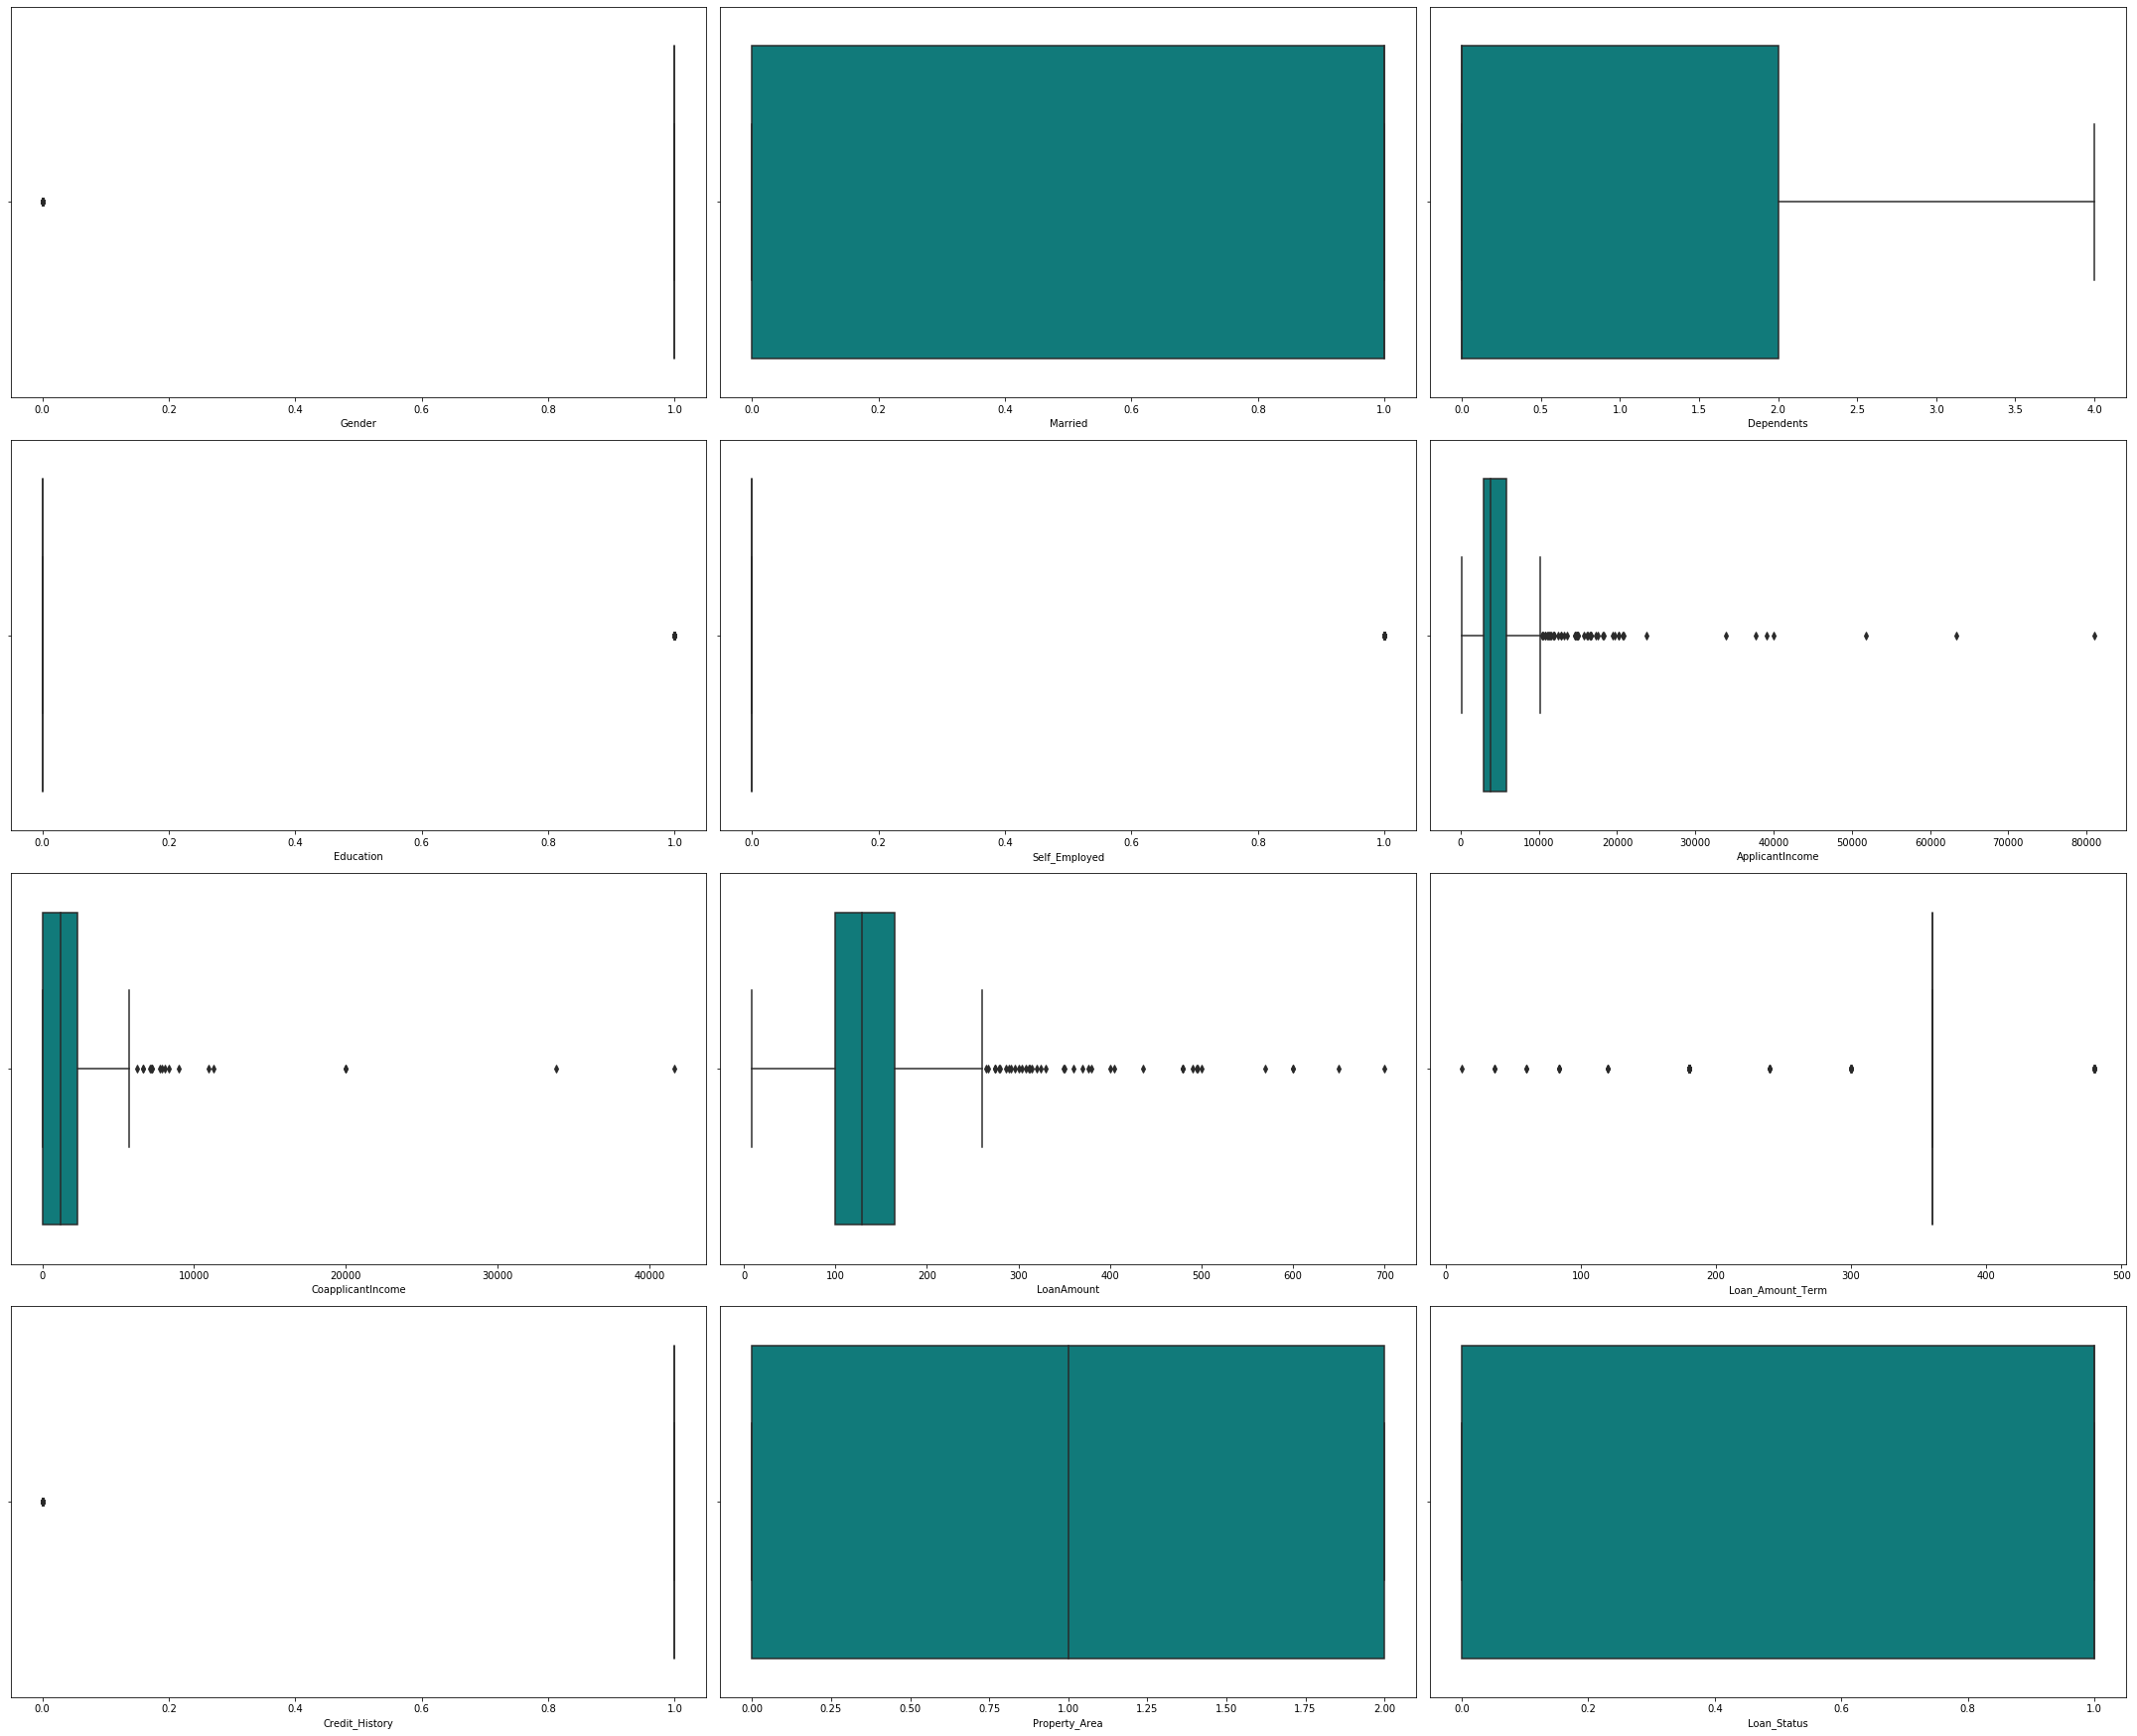

In [52]:
collist=ldf.columns.values
ncol=3
nrows=5
plt.figure(figsize=(30,30))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ldf[collist[i]],color='darkcyan',orient="V")
    plt.tight_layout()

Observation:

From above we can observe that there are Outliers in our dataset, so we need to deal with them

# Finding Z-Score
A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.

In [53]:
z_score = np.abs(zscore(ldf))

In [54]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


Observation:

From above arrays we can observe that first array shows row number and second array shows column number of values having Zscore > 3

In [55]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [56]:
ldf.shape

(614, 12)

# Remove outliers fro our data.



ldf_wo = Our DataFrame without Outliers



In [57]:
ldf_wo  = ldf.drop([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604])

In [58]:
ldf_wo.shape

(577, 12)

In [59]:
ldf_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
Gender               577 non-null int32
Married              577 non-null int32
Dependents           577 non-null int32
Education            577 non-null int32
Self_Employed        577 non-null int32
ApplicantIncome      577 non-null int64
CoapplicantIncome    577 non-null float64
LoanAmount           577 non-null float64
Loan_Amount_Term     577 non-null float64
Credit_History       577 non-null float64
Property_Area        577 non-null int32
Loan_Status          577 non-null int32
dtypes: float64(4), int32(7), int64(1)
memory usage: 42.8 KB


We have successfully removed all the outliers



# Correlation
Visualizing Correlation between our predictor variable and target variable.

Plotting a Correlation Heatmap to visualise the correlation between our dataset.

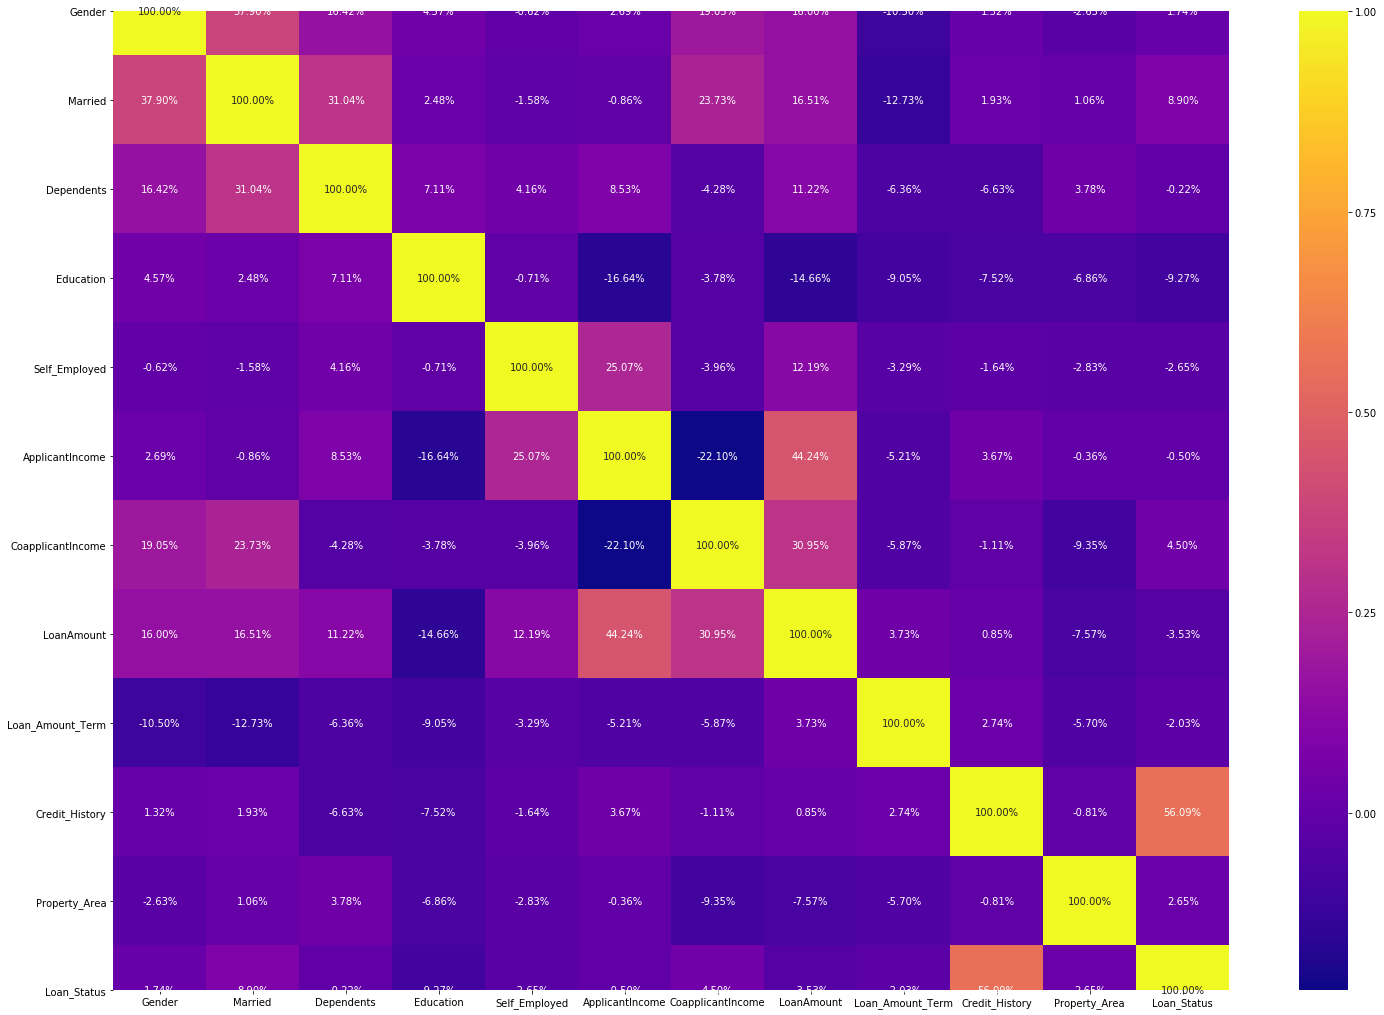

In [60]:
plt.figure(figsize= (25,18))
sns.heatmap(ldf_wo.corr() , annot = True , fmt = '.2%' , cmap = 'plasma')

In [61]:
corr_df = ldf_wo.corr()
corr_df  = corr_df.iloc[: , -1 :]
corr_df

,Loan_Status
Gender,0.017408
Married,0.089026
Dependents,-0.002160
Education,-0.092658
Self_Employed,-0.026525
ApplicantIncome,-0.005003
CoapplicantIncome,0.045009
LoanAmount,-0.035289
Loan_Amount_Term,-0.020291
Credit_History,0.560936


Observation:

From above we can observe that our predictor variables are not very much correlated with each other , so we will not require PCA for this.

# Skewness

In [62]:
x_predictor = ldf_wo.drop('Loan_Status', axis = 1)
x_predictor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [63]:
x_predictor.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.134133
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

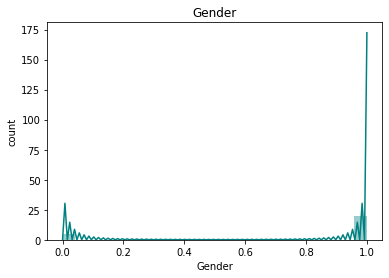

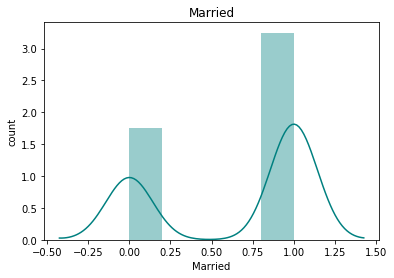

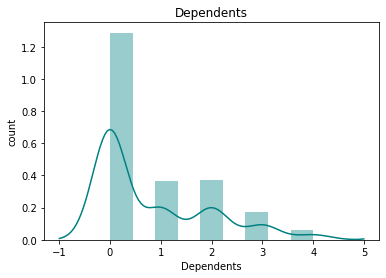

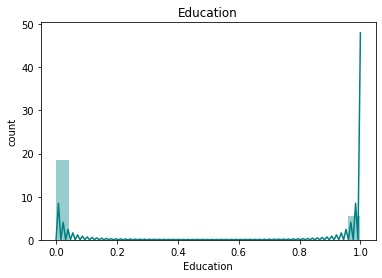

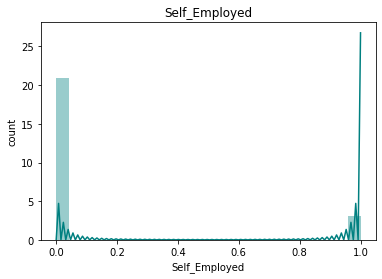

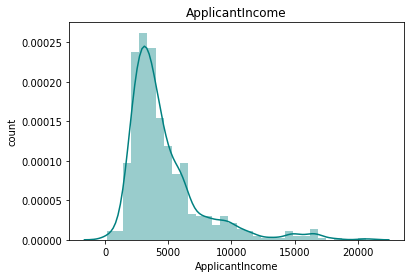

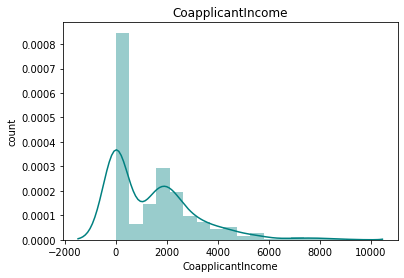

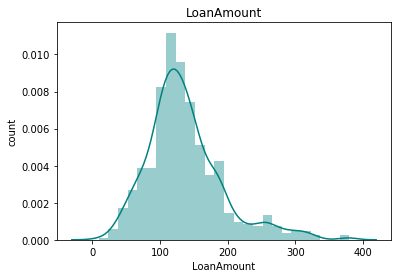

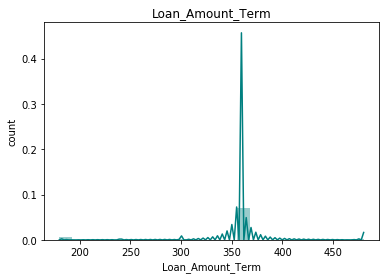

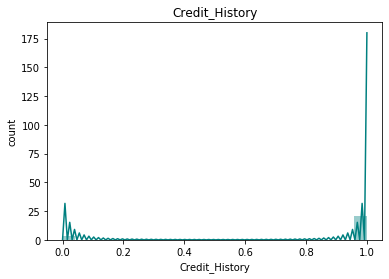

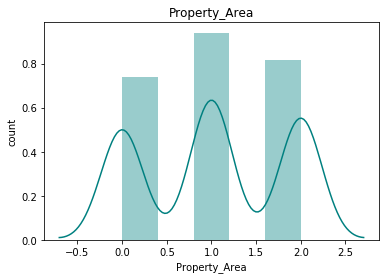

In [64]:
for feature in x_predictor :
    sns.distplot(x_predictor[feature] , kde = True , color = 'teal' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

Observation:

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here we can observe that there is skewness in our dataset.

So we will use PowerTransformer for transforming/removing skewness from our dataset.

In [65]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x_predictor)

In [66]:
x_trans = pd.DataFrame(x_t , columns = x_predictor.columns)
x_trans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.194697,0.000000,13.201111,1.681817e+07,80.55264,1.690589
1,24.870137,2.081131,0.472409,-0.000000,-0.000000,10.799279,9.832468,12.482026,1.681817e+07,80.55264,0.000000
2,24.870137,2.081131,-0.000000,-0.000000,0.087923,10.125222,0.000000,9.390267,1.681817e+07,80.55264,1.690589
3,24.870137,2.081131,-0.000000,0.166246,-0.000000,9.891003,10.631416,12.148447,1.681817e+07,80.55264,1.690589
4,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.236333,0.000000,12.996190,1.681817e+07,80.55264,1.690589
...,...,...,...,...,...,...,...,...,...,...,...
572,0.000000,0.000000,-0.000000,-0.000000,-0.000000,10.071991,0.000000,9.697075,1.681817e+07,80.55264,0.000000
573,24.870137,2.081131,0.679867,-0.000000,-0.000000,10.622891,0.000000,7.486669,2.101446e+06,80.55264,0.000000
574,24.870137,2.081131,0.472409,-0.000000,-0.000000,11.725354,6.825818,16.498185,1.681817e+07,80.55264,1.690589
575,24.870137,2.081131,0.613735,-0.000000,-0.000000,11.621649,0.000000,14.599374,1.681817e+07,80.55264,1.690589


In [67]:
x_trans.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.405342
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

Observation:

In our dataset there was categorical features also, so after conversion still they show a bit of skewness. Hence in here we need to focus on features naming - 

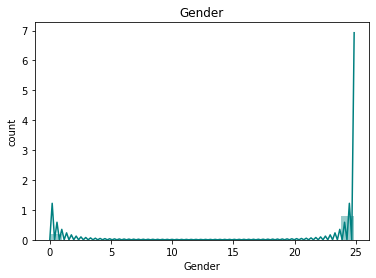

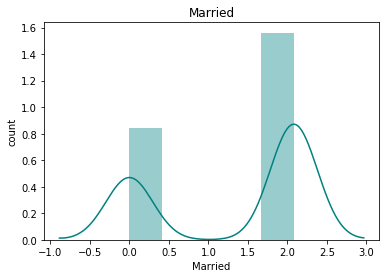

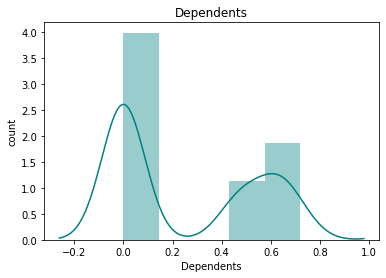

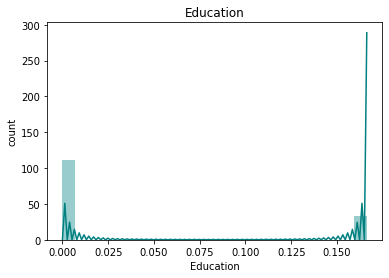

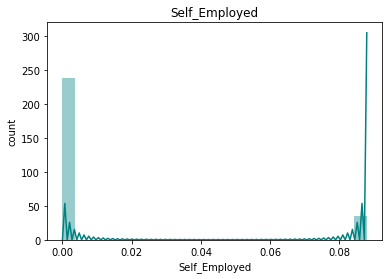

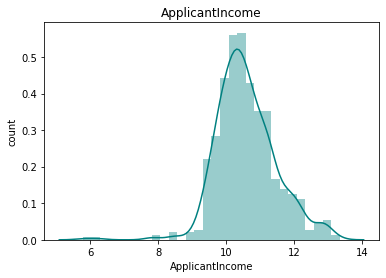

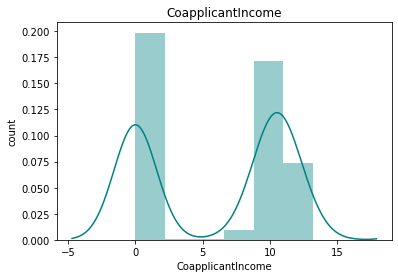

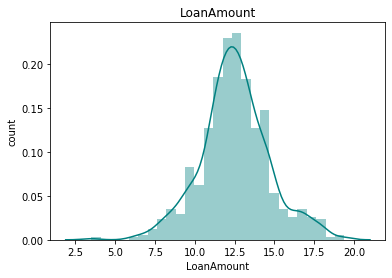

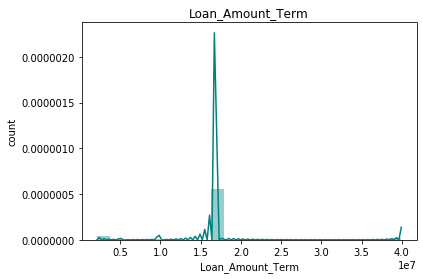

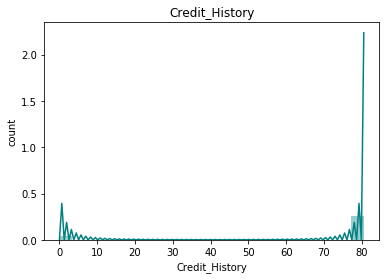

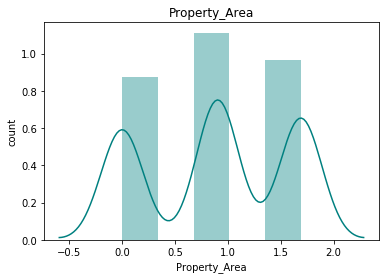

In [68]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True , color = 'teal' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

Observation:

From above we can observe that we have removed all the skewness from our  dataset .

# Standard Scaling
Gaussian's distribution with zero mean and unit variance is standard scaling

In [69]:
for i in x_trans :
    print(i , max(x_trans[i]) - min(x_trans[i]))

Gender 24.87013733506448
Married 2.081131060180808
Dependents 0.7176728487809261
Education 0.1662459515553527
Self_Employed 0.08792340599638356
ApplicantIncome 7.529739652294087
CoapplicantIncome 13.193057655265918
LoanAmount 15.884284444447664
Loan_Amount_Term 37825086.25748738
Credit_History 80.5526400060219
Property_Area 1.6905889394348181


Observation:

We can see that there is absorbable difference between values of different columns, so we will scale them.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[ 0.47713685, -1.36251079, -0.84821559, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.7695393 , ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.84821559, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.7695393 , ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.25350897, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.84821559, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [71]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.848216,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.769539,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.848216,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.848216,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.848216,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.848216,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.479978,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.769539,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.253509,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


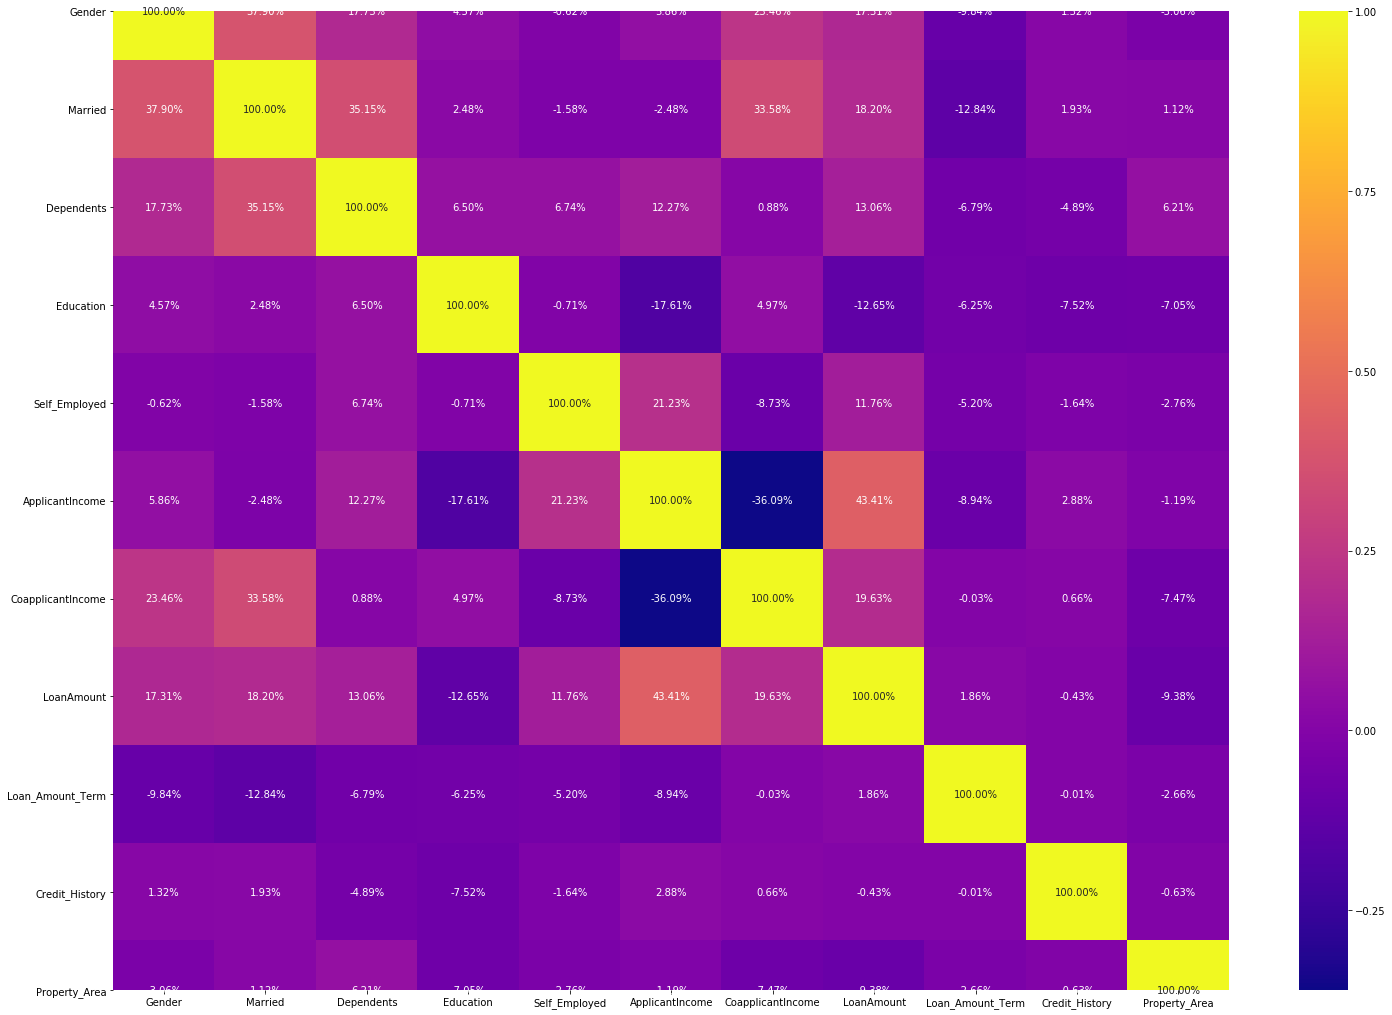

In [72]:
plt.figure(figsize= (25,18))
sns.heatmap(x_sc.corr() , cmap = 'plasma' , annot = True , fmt = '.2%')

Observation:

From above we can observe that our predictor variables are not very much correlated with each other, so we will not require PCA for this.

# Machine Learning Models

Target Variable



In [73]:
y = ldf_wo.iloc[: , -1 :]

In [74]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Finding Best Random State

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8735632183908046 on random state  86


# Importance Bar Graph
This graph shows the importance of each feature for predicting target variable .

In [76]:
importances = pd.DataFrame({'feature':x_sc.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Credit_History,0.286
ApplicantIncome,0.196
LoanAmount,0.184
CoapplicantIncome,0.115
Dependents,0.050
Property_Area,0.046
Loan_Amount_Term,0.041
Married,0.025
Education,0.022


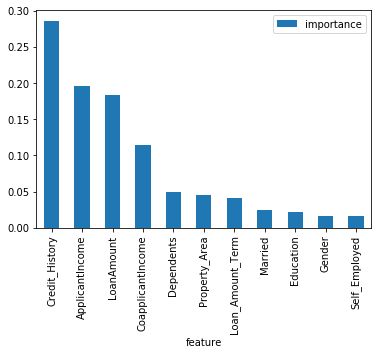

In [77]:
importances.plot.bar()

Observation:

Credit_History has the highest importance in predicting Loan_Status.

# Training on different Classifier models

In [78]:
models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(f'\n{name}')
    print('------------------------')
    print(f'\nScore :  {score}')
    print("Accuracy :",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix :\n",confusion_matrix(y_predicted, y_test))
    print("\t\tClassification Report")
    print("-" * 55)
    print(classification_report(y_predicted , y_test))
    print('________'*10)


LogisticRegression
------------------------

Score :  0.8238213399503722
Accuracy : 0.8045977011494253
Confusion Matrix :
 [[ 22   2]
 [ 32 118]]
		Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.92      0.56        24
           1       0.98      0.79      0.87       150

    accuracy                           0.80       174
   macro avg       0.70      0.85      0.72       174
weighted avg       0.90      0.80      0.83       174

________________________________________________________________________________

K Nearest Neighbor
------------------------

Score :  0.8461538461538461
Accuracy : 0.7873563218390804
Confusion Matrix :
 [[ 23   6]
 [ 31 114]]
		Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.79      0.55        29
           1       0.95      

Observation:

Best possible models are SVC and RandomForestClassifier so choosing these models for our further predictions.

# Support Vector Classifier (SVC)

In [79]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    sv = SVC()
    sv.fit(X_train,y_train)
    predsv = sv.predict(X_test)
    acc=accuracy_score(y_test,predsv)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8908045977011494 on random state  12


In [80]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=12)
sv = SVC()
sv.fit(X_train , y_train)
sv_predicted = sv.predict(X_test)
score = sv.score(X_train , y_train)

print(SVC() ," - " ,score)
print("Accuracy:",accuracy_score(sv_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(sv_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(sv_predicted , y_test))

SVC()  -  0.8114143920595533
Accuracy: 0.8908045977011494
Confusion Matrix:
 [[ 24   1]
 [ 18 131]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.96      0.72        25
           1       0.99      0.88      0.93       149

    accuracy                           0.89       174
   macro avg       0.78      0.92      0.82       174
weighted avg       0.93      0.89      0.90       174



# Random Forest Classsifier

In [81]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf = rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.867816091954023 on random state  39


In [82]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf_predicted = rf.predict(X_test)
score = rf.score(X_train , y_train)

print(RandomForestClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(rf_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(rf_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(rf_predicted , y_test))

RandomForestClassifier()  -  1.0
Accuracy: 0.8448275862068966
Confusion Matrix:
 [[ 30   7]
 [ 20 117]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.81      0.69        37
           1       0.94      0.85      0.90       137

    accuracy                           0.84       174
   macro avg       0.77      0.83      0.79       174
weighted avg       0.87      0.84      0.85       174



Observation:

From above we can find that RandomForest is giving the best accuracies 

# Hyperparameter tuning (RandomForest)

In [83]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [84]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [85]:
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}


In [86]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)

random_forest = RandomForestClassifier(n_estimators=1400, min_samples_split=5, 
                                       max_features='sqrt', oob_score = True, max_depth=80, bootstrap=True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

96.53 %


# Confusion Matrix

In [87]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 61,  68],
       [ 19, 255]], dtype=int64)

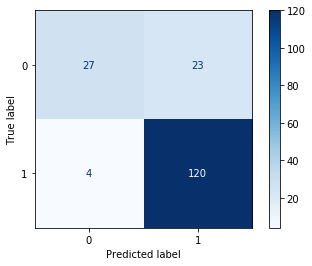

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest, X_test , y_test , cmap = 'Blues' )

# Precision and Recall

In [89]:
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7894736842105263
Recall: 0.9306569343065694


Plotting y_test and y_predicted for our datset .

-> 1, Train: 0.769, Test: 0.793
-> 2, Train: 0.804, Test: 0.851
-> 3, Train: 0.804, Test: 0.851
-> 4, Train: 0.816, Test: 0.851
-> 5, Train: 0.824, Test: 0.851
-> 6, Train: 0.849, Test: 0.851
-> 7, Train: 0.873, Test: 0.851
-> 8, Train: 0.911, Test: 0.833
-> 9, Train: 0.931, Test: 0.833
-> 10, Train: 0.963, Test: 0.833


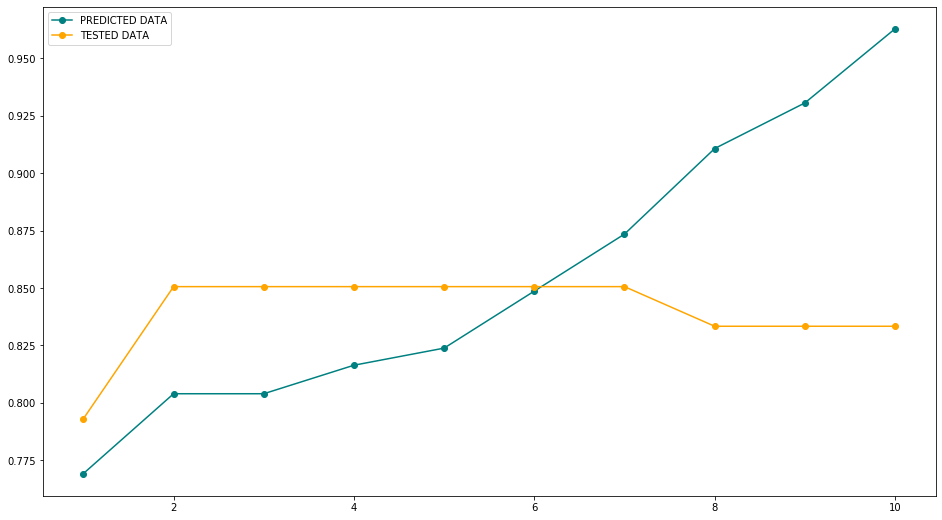

In [90]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 11)]

for i in values:
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)
    model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=i)
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    
    
    
    print('-> %d, Train: %.3f, Test: %.3f' % (i, train_accuracy, test_accuracy))

plt.figure(figsize=(16,9))
plt.plot(values, train_scores, '-o', label='PREDICTED DATA' , color = 'teal')
plt.plot(values, test_scores, '-o', label='TESTED DATA' , color = 'orange')
plt.legend()
plt.show()

# Getting the probabilities

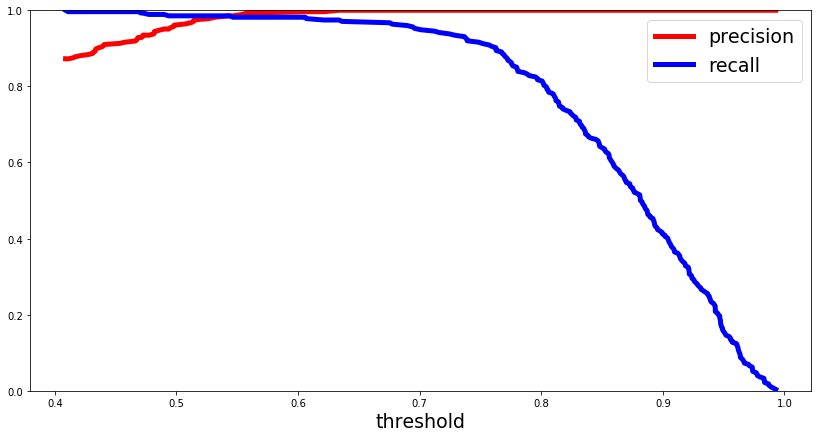

In [91]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

# ROC_AUC Curve

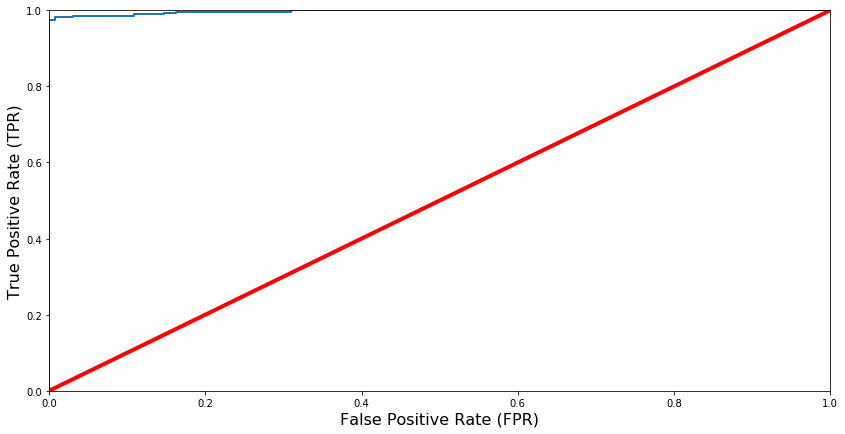

In [92]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# Conclusion
RandomForestClassifier is the best model with an accuracy of 96.28%

In [93]:
import joblib
joblib.dump(random_forest, 'loan-application-model.pkl')

['loan-application-model.pkl']